In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
%matplotlib inline

In [6]:
data=pd.read_csv('/content/drive/MyDrive/OnlineRetail.csv', encoding='cp1252',header=0)

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
data=data.dropna()

In [10]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [11]:
data['Revenue']=data['Quantity']*data['UnitPrice']

In [12]:
data['CustomerID'] = data['CustomerID'].astype(str)
data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')

In [13]:
a = data['Description'].str.split()
data['Type'] = a.apply(lambda x: ' '.join(x[-2:]))


In [14]:
data['Revenue']=data['Quantity']*data['UnitPrice']

In [15]:
data['Type'].nunique()

2333

In [16]:
#DATA VISIUALIZATION

Text(0, 0.5, 'Total Revenue')

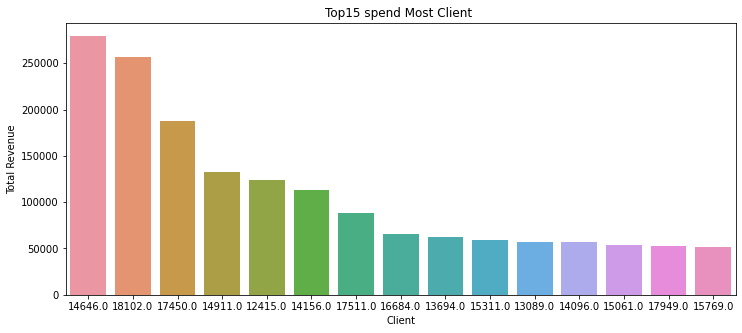

In [17]:
#TOP 15 SPEND MOST CLENT
Rev_Coustomer=data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).reset_index()[:15]
#Visualize
plt.figure(figsize=(12,5))
sns.barplot(x='CustomerID', y='Revenue', data=Rev_Coustomer)
plt.title("Top15 spend Most Client ")
plt.xlabel('Client')
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Revenue')

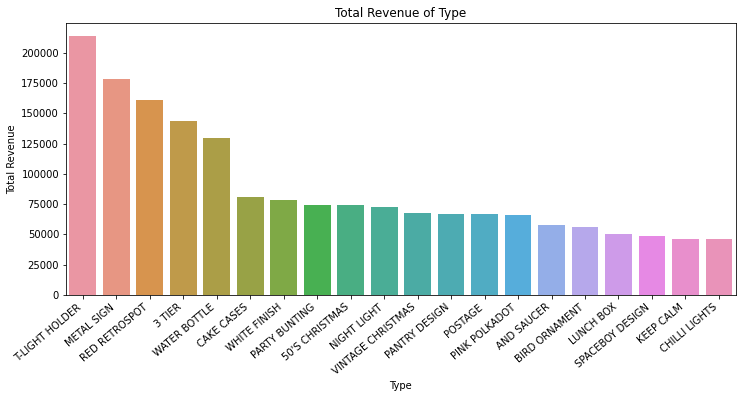

In [18]:
# top20 most revenue type
#get grouped of total revenue and type
Rev_Country=data.groupby('Type')['Revenue'].sum().sort_values(ascending=False).reset_index()[:20]
#Visualize
plt.figure(figsize=(12,5))
sns.barplot(x='Type', y='Revenue', data=Rev_Country)
plt.xticks(rotation=40,ha='right')
plt.title("Total Revenue of Type")
plt.xlabel('Type')
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Revenue')

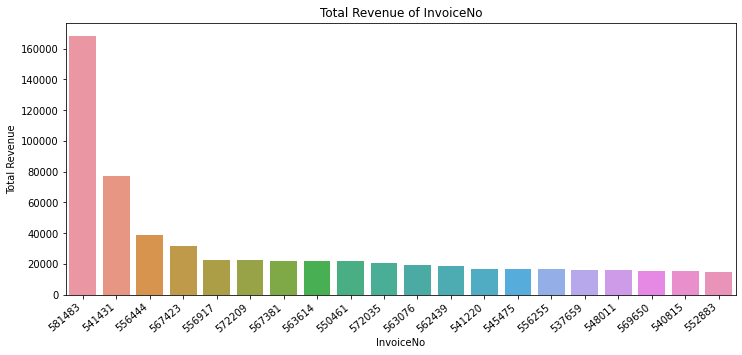

In [19]:
# top20 most revenue order
#get grouped of total revenue and type
Rev_Country=data.groupby('InvoiceNo')['Revenue'].sum().sort_values(ascending=False).reset_index()[:20]
#Visualize
plt.figure(figsize=(12,5))
sns.barplot(x='InvoiceNo', y='Revenue', data=Rev_Country)
plt.xticks(rotation=40,ha='right')
plt.title("Total Revenue of InvoiceNo")
plt.xlabel('InvoiceNo')
plt.ylabel('Total Revenue')

In [20]:
## For Each Type, The customer bought the most
grouped=data.groupby(['Type','CustomerID'])['Quantity'].sum().reset_index()
grouped = grouped.sort_values(by=['Type','Quantity'],ascending=[True,False])
grouped['Rank']=grouped.groupby(['Type']).cumcount() + 1
Most_customer_Type=grouped[['Type','CustomerID','Quantity']][grouped['Rank']==1]
Most_customer_Type

,Type,CustomerID,Quantity
157,& CROSSES,17086.0,156
204,& LADDERS,12830.0,288
396,& LEAF,14801.0,2
400,& NEST,14911.0,34
414,& PENS,16723.0,25
...,...,...,...
217664,ZINC PLANTER,13644.0,6
217681,ZINC STAR,14298.0,144
217727,ZINC TREE,12597.0,72
217770,ZINC/GLASS CANDLEHOLDER,14298.0,24


Text(0, 0.5, 'Total Revenue')

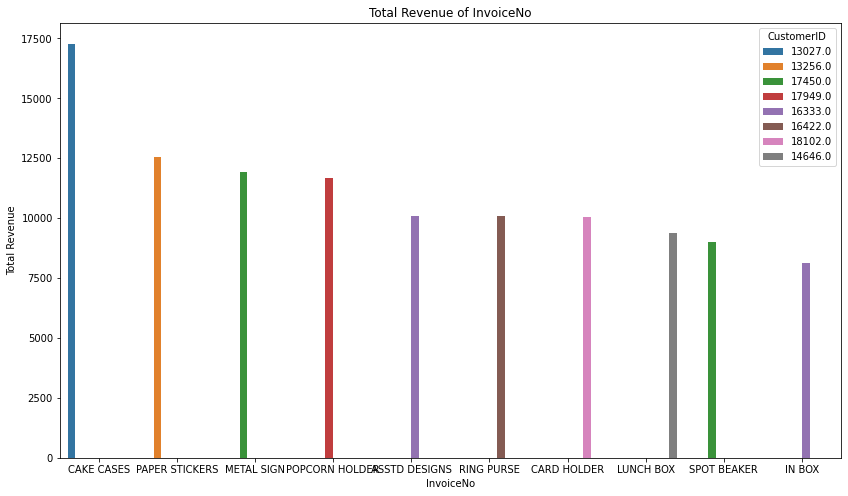

In [21]:
# Top10 type bought most by single client
Type_SingleClient=Most_customer_Type.sort_values(by='Quantity',ascending=False).reset_index()[:10]
#Visualize
plt.figure(figsize=(14,8))
sns.barplot(x='Type', y='Quantity',hue='CustomerID',data=Type_SingleClient)
plt.title("Total Revenue of InvoiceNo")
plt.xlabel('InvoiceNo')
plt.ylabel('Total Revenue')

In [22]:
#Data Processing

In [23]:
# Create Primary Key for Type
a=data['Type'].unique()
df=pd.DataFrame(data=a.flatten()).reset_index()
df['Type']=df[0]
df=df[['index','Type']]
df

,index,Type
0,0,T-LIGHT HOLDER
1,1,METAL LANTERN
2,2,COAT HANGER
3,3,WATER BOTTLE
4,4,WHITE HEART.
...,...,...
2328,2328,HAPPY FOREST
2329,2329,COUNTRY STYLE
2330,2330,PERFECTLY PRETTY
2331,2331,RIBBONS PARTY


In [24]:
#Merge with data
data=data.merge(df,how='inner',on="Type")

In [25]:
data.rename(columns = {'index':'Type_ID'}, inplace = True)


In [26]:
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Type,Type_ID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,T-LIGHT HOLDER,0
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.5,T-LIGHT HOLDER,0
2,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3,T-LIGHT HOLDER,0
3,536373,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 09:02:00,4.25,17850.0,United Kingdom,25.5,T-LIGHT HOLDER,0
4,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.3,T-LIGHT HOLDER,0


In [27]:
# Type Amount
Type_amount=data.groupby('Type_ID')['Revenue'].sum().reset_index()
Type_amount.rename(columns = {'Revenue':'Amount'}, inplace = True)
Type_amount

,Type_ID,Amount
0,0,213835.37
1,1,5776.18
2,2,6962.88
3,3,129329.52
4,4,13354.06
...,...,...
2328,2328,216.45
2329,2329,449.96
2330,2330,684.05
2331,2331,458.63


In [28]:
# Type Amount
Type_amount=data.groupby('Type_ID')['Revenue'].sum().reset_index()
Type_amount.rename(columns = {'Revenue':'Amount'}, inplace = True)
Type_amount

,Type_ID,Amount
0,0,213835.37
1,1,5776.18
2,2,6962.88
3,3,129329.52
4,4,13354.06
...,...,...
2328,2328,216.45
2329,2329,449.96
2330,2330,684.05
2331,2331,458.63


In [29]:
#Type Frequency
Type_Frequency=data.groupby('Type_ID')['Type'].count().reset_index()
Type_Frequency.columns = ['Type_ID', 'Frequency']
Type_Frequency

,Type_ID,Frequency
0,0,7286
1,1,272
2,2,250
3,3,5258
4,4,333
...,...,...
2328,2328,22
2329,2329,21
2330,2330,39
2331,2331,13


In [30]:
df=pd.merge(Type_amount,Type_Frequency,how="inner",on='Type_ID')

In [31]:
c=data[['Type','Type_ID']].drop_duplicates()
c

,Type,Type_ID
0,T-LIGHT HOLDER,0
7286,METAL LANTERN,1
7558,COAT HANGER,2
7808,WATER BOTTLE,3
13066,WHITE HEART.,4
...,...,...
406732,HAPPY FOREST,2328
406754,COUNTRY STYLE,2329
406775,PERFECTLY PRETTY,2330
406814,RIBBONS PARTY,2331


In [32]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Type,Type_ID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,T-LIGHT HOLDER,0
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,T-LIGHT HOLDER,0
2,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,T-LIGHT HOLDER,0
3,536373,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 09:02:00,4.25,17850.0,United Kingdom,25.50,T-LIGHT HOLDER,0
4,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.30,T-LIGHT HOLDER,0
...,...,...,...,...,...,...,...,...,...,...,...
406824,581175,23561,SET OF 6 RIBBONS PARTY,60,2011-12-07 15:16:00,2.49,14646.0,Netherlands,149.40,RIBBONS PARTY,2331
406825,581266,23561,SET OF 6 RIBBONS PARTY,12,2011-12-08 11:25:00,2.89,12621.0,Germany,34.68,RIBBONS PARTY,2331
406826,581581,23561,SET OF 6 RIBBONS PARTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom,17.34,RIBBONS PARTY,2331
406827,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,LITTLE BIRDIE,2332


In [33]:
#Type Recency
max_date = max(data['InvoiceDate'])
data['Diff'] = max_date - data['InvoiceDate']
Type_Recency=data.groupby('Type_ID')['Diff'].min().reset_index()
Type_Recency['Diff']=Type_Recency['Diff'].dt.days+1
Type_Recency.rename(columns = {'Diff':'Recency'}, inplace = True)

In [34]:
df=df.merge(Type_Recency,how="inner",on="Type_ID")

In [35]:
df

,Type_ID,Amount,Frequency,Recency
0,0,213835.37,7286,1
1,1,5776.18,272,2
2,2,6962.88,250,4
3,3,129329.52,5258,1
4,4,13354.06,333,1
...,...,...,...,...
2328,2328,216.45,22,2
2329,2329,449.96,21,2
2330,2330,684.05,39,1
2331,2331,458.63,13,1


In [36]:
#Scaling the attributes
df=df[['Amount', 'Frequency', 'Recency']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Amount', 'Frequency', 'Recency']

In [37]:
df_scaled

,Amount,Frequency,Recency
0,19.629792,16.898855,-0.513765
1,0.207101,0.231967,-0.502468
2,0.317881,0.179690,-0.479873
3,11.741022,12.079858,-0.513765
4,0.914509,0.376917,-0.513765
...,...,...,...
2328,-0.311910,-0.362091,-0.502468
2329,-0.290111,-0.364467,-0.502468
2330,-0.268258,-0.321695,-0.513765
2331,-0.289302,-0.383477,-0.513765


In [38]:
#K Means Clustering Analysis

In [39]:
# determine the best number of clusters
clusters = range(2, 30)
inertias = []
silhouettes = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans = kmeans.fit(df_scaled)
    label = kmeans.predict(df_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_scaled, label))

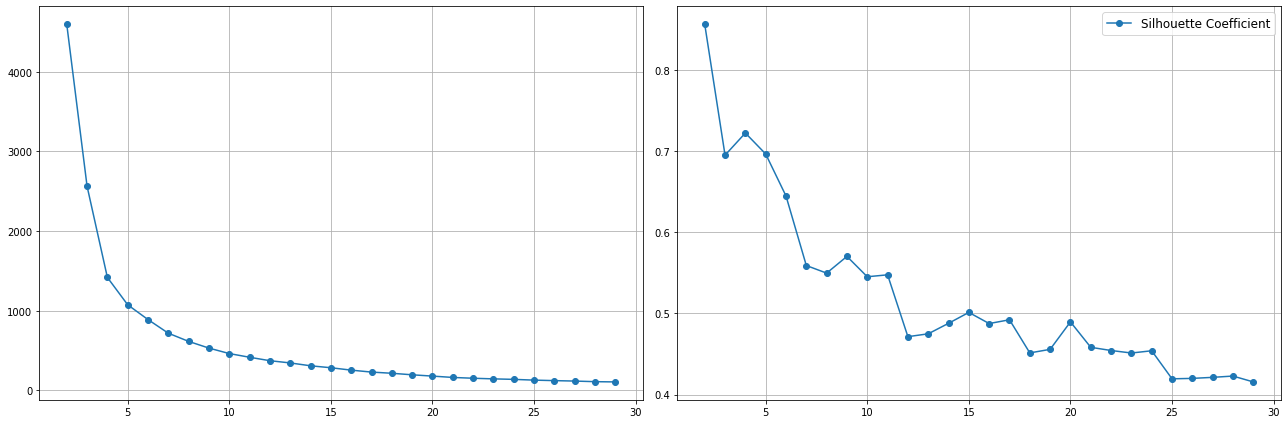

In [40]:
# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(clusters, inertias, 'o-', label='Sum of Squared Distances')
ax[0].grid(True)
ax[1].plot(clusters, silhouettes, 'o-', label='Silhouette Coefficient')
ax[1].grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
# 25 clusters is the best choice
# build K-Means model
kmeans = KMeans(n_clusters=25, init='k-means++', random_state=42)
kmeans = kmeans.fit(df_scaled)
label = kmeans.predict(df_scaled)

In [42]:
# PCA
pca = PCA(n_components=3, random_state=42)
pca = pca.fit(df_scaled)
pca_feature = pca.transform(df_scaled)

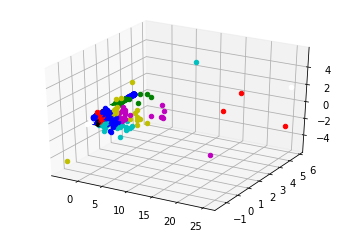

In [43]:
# 3D visualization th 25 Clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig = plt.figure()
ax = plt.axes(projection='3d')

for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y = pca_feature[j][1]
    z = pca_feature[j][2]
    ax.scatter3D(x, y,z, 'o', color=colors[label[j] % 8])
    name = c[c['Type_ID'] == j + 1]['Type']
plt.show()

In [44]:
# print each cluster Type_name
df = pd.DataFrame({'Type_ID': list(range(1, 2334)), 'label': label})
df = pd.merge(left=df, right=c, on='Type_ID', how='left')

for i in range(0, 25):
    print(i, '\t', list(df[df['label'] == i]['Type']))

0 	 ['NEW ENGLAND', 'GIFT TAPE', 'POLITICAL GLOBE', 'CIRCUS PARADE', 'SET VINTAGE', 'PLANET MUG', 'WHITE FINISH', 'BIN FLORA', 'PERSONAL DOORSIGN', 'BAG SUKI', 'DRAWER KNOB', 'BANK RETROSPOT', 'TEA COSY', 'COAT RACK', 'BAG RETROSPOT', 'HOLDER HANGING', 'PLANT HOLDER', 'BIN CREAM', 'HANGING DECORATION', 'DINER ASSORTED', 'SCENTED CANDLES', 'MAGIC TOADSTOOL', 'SEWING KIT', 'CARNIVAL ASSORTED', 'PAINTED ZINC', 'FAIRY CAKE', 'PICTURE DOMINOES', 'ROSE COASTERS', 'DISCO BALL', 'BATTERY OPERATED', 'LOOKING MIRROR', 'PARTY CANDLES', 'T-LIGHTS SANTA', 'TABLE LIGHT', 'JEWELLED MIRROR', 'PINKS RIBBONS', 'BLUES RIBBONS', 'A CAKE', 'TUBE SKULLS', 'BIRD PANNETONE', 'SPACEBOY PEN', 'DOORMAT HEARTS', 'WRAP COWBOYS', 'BIRTHDAY COWBOY', 'CHRISTMAS PANNETONE', 'T-LIGHT HLDR', 'SPINNING TOPS', 'CUSHION OWL', 'PENCIL ERASERS', 'W BOBBLES', 'SPEAKER GIRLS', 'HOLLY BELLS', 'BAG STRAWBERRY', 'POLKADOT PLATE', 'SMALL RED', 'SOCK BAUBLE', 'CHRISTMAS NAPKINS', 'GINGHAM SACK', 'GINGHAM STAR', 'LOLA DOLL', 'BABUSH